# uni linear regression

In [ ]:
import numpy as np
x=[1,2,3,4,5,6]
y=[6,5,4,3,2,1]
mean_x = np.mean(x)
mean_y = np.mean(y)
 
def linreg(x,y):
 # Using the formula to calculate b1 and b2
 numer = 0
 denom = 0
 m=len(x)
 for i in range(m):   
   numer += (x[i] - mean_x) * (y[i] - mean_y)   
   denom += (x[i] - mean_x) ** 2
 
 b1 = numer / denom
 
 b0 = mean_y - b1*mean_x
 print(b1,b0)
 return b1,b0
a=linreg(x,y)
print(a)
 


-1.0 7.0
(-1.0, 7.0)


#sample for linear regression

In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/1.01.%20Simple%20linear%20regression.csv")
data.head()
data.shape


(84, 2)

In [ ]:
y = data["GPA"]
print(y.shape)
x = data["SAT"]
print(x.shape)

(84,)
(84,)


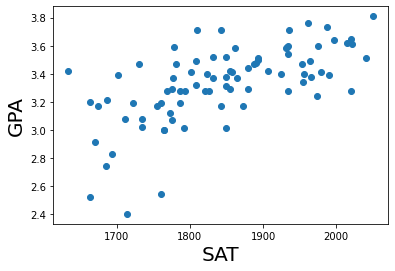

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel("SAT", fontsize = 20)
plt.ylabel("GPA", fontsize = 20)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

#sample 1

y = [data["GPA"]]
print(type(y))
x = [data["SAT"]]

#the value should be passed as list --> so in above converting the dataframe to list

model = LinearRegression().fit(x, y)
 
#y1=pd.DataFrame(y).T
#y1
 
#type(y1)


<class 'list'>


In [ ]:
#sample 2

model = LinearRegression()
x = np.array(x).reshape(-1,1) #transpose the rows and cols
#print(x.shape)
y = np.array(y).reshape(-1,1)
#print(y)
model=LinearRegression()
results = model.fit(x,y)

In [ ]:
# intercept and slope for univariant

r_sq = model.score(x, y)
#print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: [0.2750403]
slope: [[0.00165569]]


In [ ]:
#manually checking by passing mark, before predication we have to train it

print(model.predict([[1800]]))

[[3.25527879]]


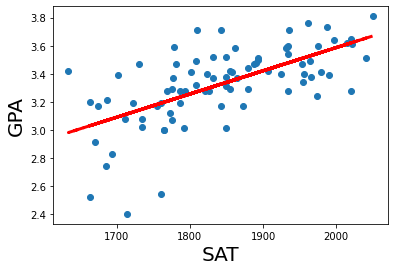

In [ ]:
plt.scatter(x,y)                     ## Plotting the points
y_new = 0.00165569*x + 0.2750403            ## Defining the equation and
plt.plot(x,y_new, 'r--',lw=3, label='regression line') ## Plotting the line, x is the same for both,
                                                      ## but y_new is the lines predicted by the equation
plt.xlabel('SAT', fontsize=20)       ## Defining the x-label name
plt.ylabel('GPA', fontsize=20)       ## Defining the y-label name
plt.show()                           ## Showing the plot, this line will remove, unnecessary text at the top of the graph

#sample with data set

all the data in this particular dataset can be used as feature and any one col can be considered as the target.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import hvplot.pandas

data=pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/USA_Housing.csv")
 
print(data.shape)
data.head()

(5000, 7)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
# fixing the features and targets
# x - feature and feature is 2D here
# y - Target and in 1D
X = data[["Avg. Area House Age","Avg. Area Number of Rooms",  "Avg. Area Number of Bedrooms",'Area Population','Avg. Area Income']].values
y = data['Price'].values
print(y)
print(X[0])

[1059033.55787012 1505890.91484695 1058987.98787608 ... 1030729.58315229
 1198656.87240769 1298950.48026696]
[5.68286132e+00 7.00918814e+00 4.09000000e+00 2.30868005e+04
 7.95454586e+04]


# splitting the test data, train data

In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#random state -0 -> so that each time it takes same set of data
#test size is 30% the standard percentage for testing and training the std is 70%

#normalization - fixing the range of the content in the table

giving equal oppurtunities for all the features. by using the inbuild function

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# pipeline used to perform multiple operation 

pipeline = Pipeline([
   ('std_scalar', StandardScaler()) #standard Scaler does the normalization
])

#normalizing the feature alone is enough.
 
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.fit_transform(X_test)
print(X_train)
print(X_test)


[[ 0.47493768  0.2135076   1.21581933 -0.66175338  0.8820858 ]
 [ 0.13034685 -1.78149272 -1.35902999  1.60971646  0.12942398]
 [-0.38555165 -0.48271322 -1.52906721  1.22206855 -0.25461195]
 ...
 [-0.62780257  0.39293187  0.17940199 -0.62510121 -0.13697301]
 [-1.09210704  0.24531038 -0.61410503  0.51332171 -1.50340373]
 [ 0.56393867 -1.85245555 -1.51287319  1.16850024  1.70980244]]
[[-0.70372869 -0.78003274  0.15873739  0.66582002 -0.69833113]
 [-0.6581481  -1.01412166 -1.2884195   0.40990841 -0.49405135]
 [-0.70308806 -0.93736328 -0.02012469 -1.03471338  0.23940085]
 ...
 [ 1.75477437 -0.80172396  0.3132092   0.71475486 -0.49932053]
 [-1.51813816  0.07109905  1.03678764  0.30477441 -1.30994666]
 [-0.04483382 -1.26323285 -0.02012469  0.16610341 -2.6674888 ]]


**Training the Model**

In [ ]:
from sklearn.linear_model import LinearRegression
 
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

**Expected 5 solpes and 1 intercepts**

Y = mx1+mx2.....+mx5+c

since we have given 1 target and 5 feature.

In [ ]:
print(lin_reg.intercept_) #lin_reg is trained dataset
print(lin_reg.coef_)

1229329.1193176818
[165031.99098952 122210.06746546   2173.68843825 149669.76854912
 230245.72500496]


**Testing the Train Model**

In [ ]:
score = lin_reg.score(X_test,y_test)
print(score)
print(score * 100,"%")

0.9192276052266539
91.92276052266538 %


**calculate the error rate**

sqrt(sum(predicted -actual))/n

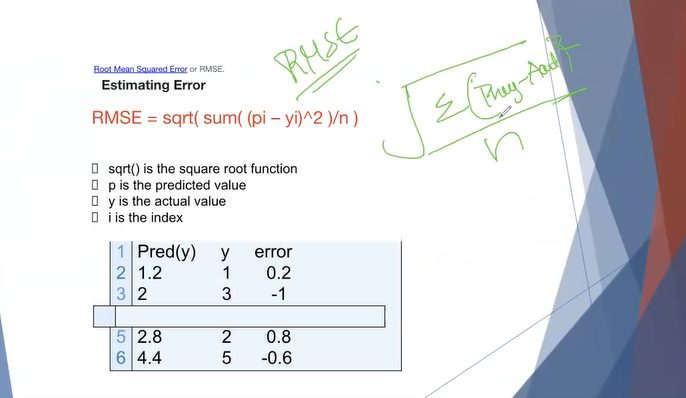

In [ ]:
y_pred = lin_reg.predict(X_test)
print(y_pred)

[ 957073.93738066  941574.81475005  898953.83301296 ... 1413635.88328449
  733736.32604359  478189.35602505]


In [ ]:
from sklearn import metrics

#only target value should be passed that y we are using ytest

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 82062.7171711911
Mean Squared Error: 10447038140.009094
Root Mean Squared Error: 102210.75354388644


# pickel - storing the trained model

In [ ]:
import pickle
with open("knowlege_pkl","wb") as files:
 pickle.dump(lin_reg, files)


In [ ]:
import pickle
with open("knowlege_pkl","rb") as files:
 model=pickle.load(files)

#predicting by giving manual input

In [ ]:
model.predict([[5,200,120,30,10]]) #list is the no of feature...

array([33549895.48646936])

#09Jan23 KNN ALGORITHM

**CLASSIFICATION ALGORITHM**

DIFFERENCE BETWEEN CLASSIFICATION,REGRESSION

1. REGRESSION - PREDICT

2. CLASSIFICATION - GROUP BY SPECIFIC CATEGORIES

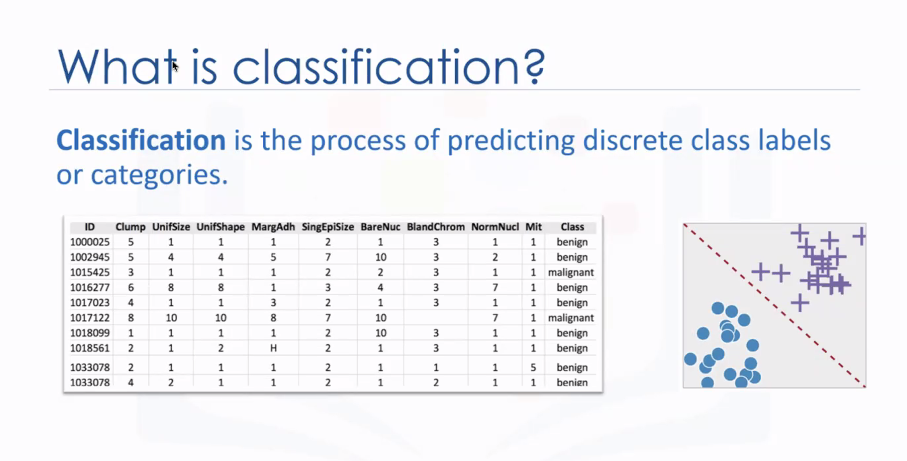

**KNN - K NEAREST NEIGHBOUR ALGORITHM**



Feature - Hair length, Weight

Target - Gender

in this there is two group so K=2


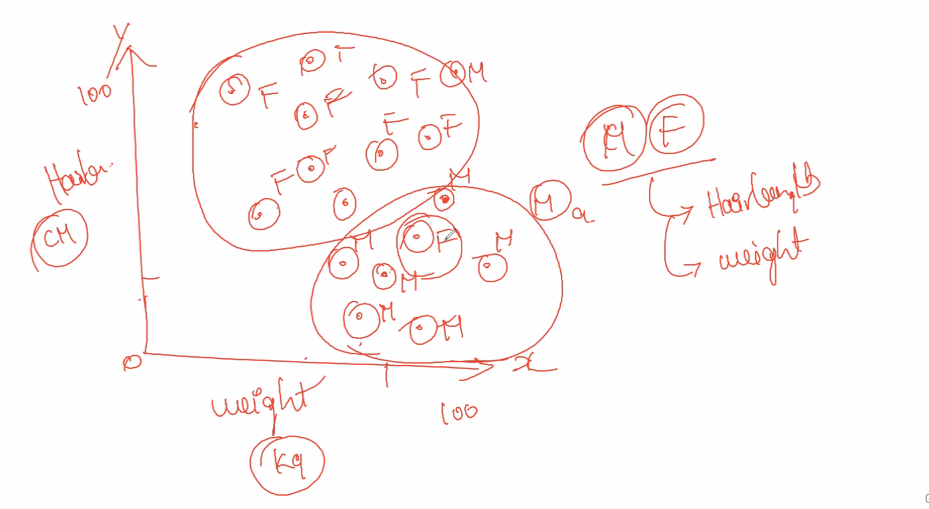

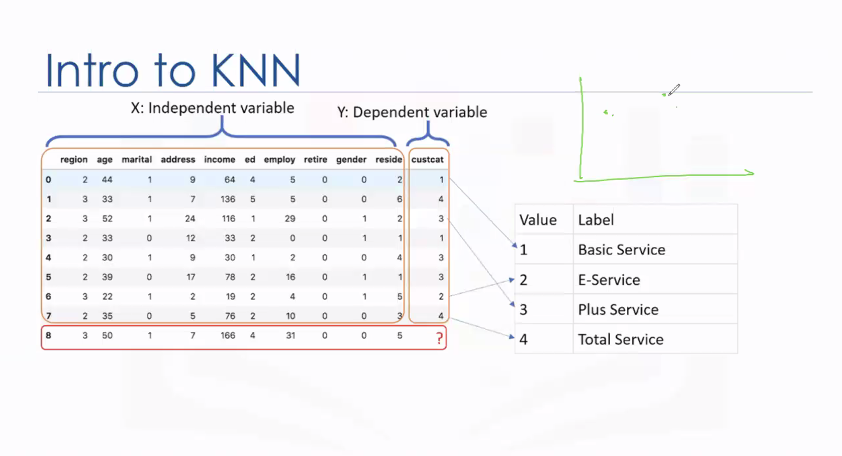

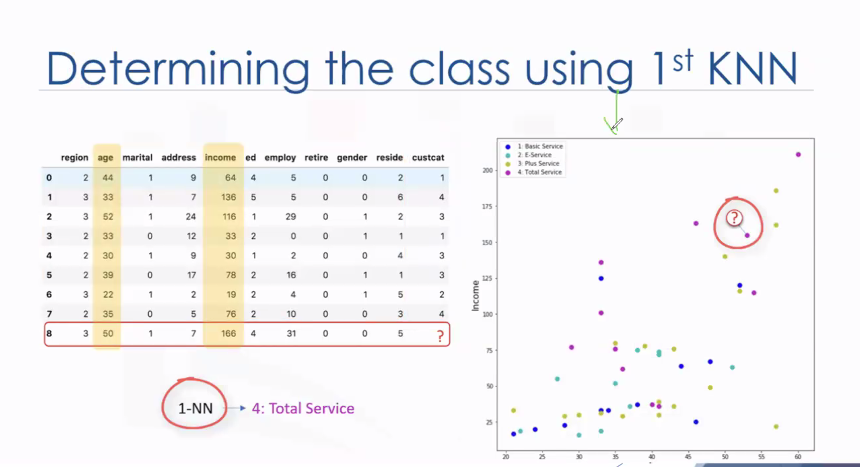

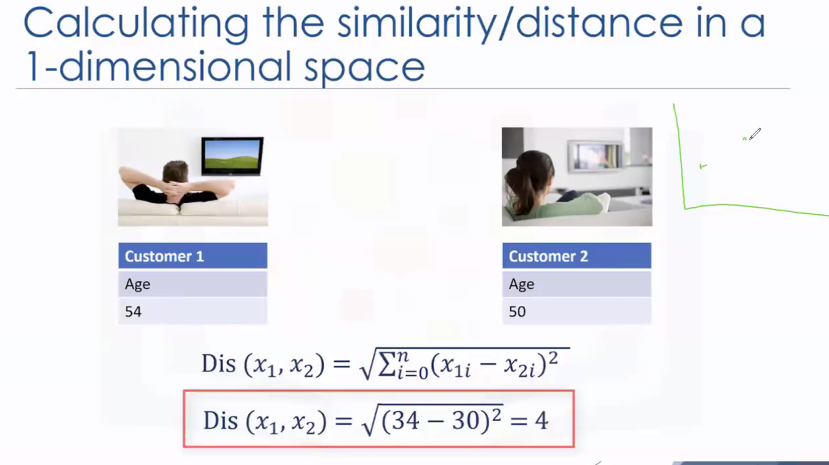

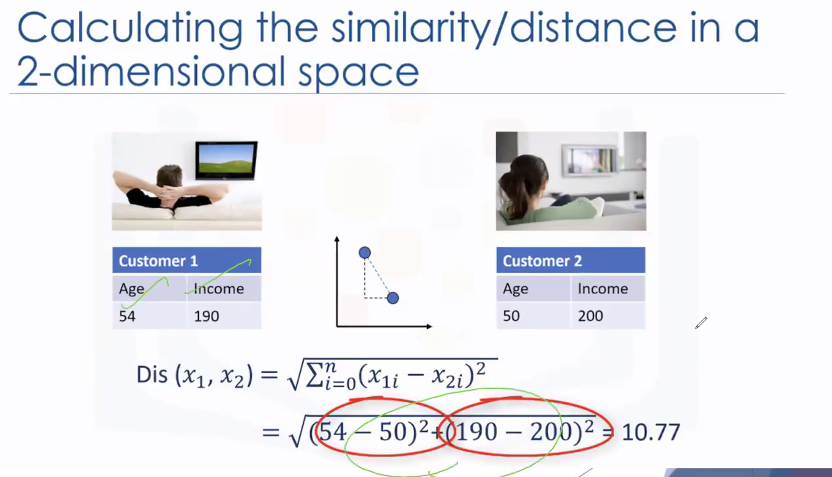

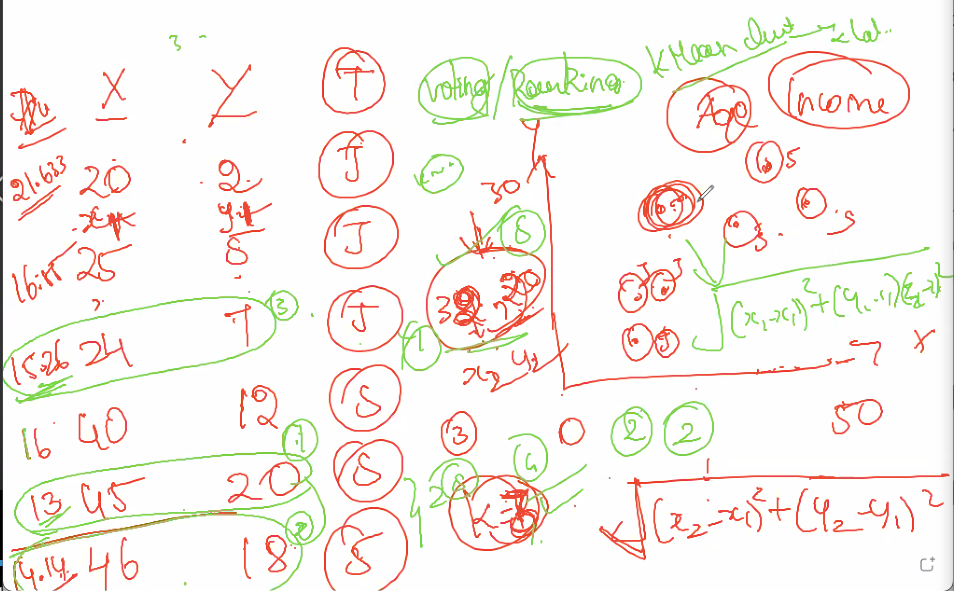

In [ ]:
#CODE TO CHECK KNN 

import math

x=[100,50,25,80,60,40,45]
z=['UF','F','UF','F','F','F','UF']
y=[0,50,40,60,50,100,25]
t={}

for i in range(len(x)):
    t[math.sqrt(((x[i]-70)**2)+((y[i]-15)**2))]=z[i]

myKeys = list(t.keys())
myKeys.sort()
sorted_dict = {i: t[i] for i in myKeys}

print(list(sorted_dict.values())[0]) 

UF


#knn sample

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline




In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [ ]:
x = df[['age','marital','income']].values
x[0:5]

y =df['gender'].values

In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print('Train set: ',X_train.shape,y_train.shape)
print('Test set: ',X_test.shape,y_test.shape)
#random state -0 -> so that each time it takes same set of data
#test size is 30% the standard percentage for testing and training the std is 70%

Train set:  (700, 3) (700,)
Test set:  (300, 3) (300,)


In [ ]:
#from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 4
#Train Model and Predict 
model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
model

# print('Mean Absolute Error:', model.mean_absolute_error(y_test, y_pred))



KNeighborsClassifier(n_neighbors=4)

In [ ]:
yhat = model.predict(X_test)
yhat


array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
data=[1,10,35,0,100000,5,5,0,1]
model.predict([data])

In [ ]:

from sklearn import metrics
#print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))



Test set Accuracy:  0.45


In [ ]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))



Train set Accuracy:  0.6471428571428571
Test set Accuracy:  0.4866666666666667


In [ ]:
K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
ConfustionMx = [];
for n in range(1,K):
  
   #Train Model and Predict 
   neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
   yhat=neigh.predict(X_test)
   mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
 
  
   std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
 
print(mean_acc)
print(std_acc)

[0.53333333 0.51666667 0.5        0.45       0.48666667 0.48666667
 0.46666667 0.47       0.47333333]
[0.02880329 0.02885147 0.02886751 0.02872281 0.02885725 0.02885725
 0.02880329 0.02881551 0.02882643]


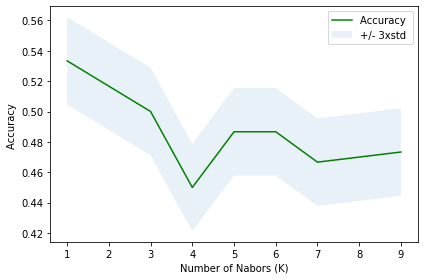

In [ ]:
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()



In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.5333333333333333 with k= 1


In [ ]:
comment,like,share(F) --> Total Interaction(T)
facebook -->GitHub

#brest cancer data set- KNN algo

In [ ]:
import pandas as pd
 
data_dir = "https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/breast-cancer.csv"
df_breast = pd.read_csv(data_dir)
df_breast

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,0
679,841769,2,1,1,1,2,1,1,1,1,0
680,888820,5,10,10,3,7,3,8,10,2,1
681,897471,4,8,6,4,3,4,10,6,1,1


In [ ]:
df_breast.columns

Index(['ID', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
x1 = df_breast[['Clump Thickness', 'Uniformity of Cell Size','Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses']] .values  #.astype(float)
print(x1[0:5])

y1 = df_breast[['Class']].values
print(y1[0:5])


[[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]
 [ 3  1  1  1  2  2  3  1  1]
 [ 6  8  8  1  3  4  3  7  1]
 [ 4  1  1  3  2  1  3  1  1]]
[[0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x1, y1, test_size=0.3, random_state= 2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (478, 9) (478, 1)
Test set: (205, 9) (205, 1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 15
#Train Model and Predict 
model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
model


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [ ]:
#applying the test to predicit the result
yhat = model.predict(X_test)
yhat

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0])

In [ ]:
from sklearn import metrics
#print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.9414634146341463


# 10Jan23 - Unsupervised learning